# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov 16, 2023 2:08 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **100**/100

Score breakdown:
* Problem 1 - 30/30
* Problem 2 - 70/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*


C:\Users\admin\AppData\Local\Temp\ipykernel_7820\1615627028.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


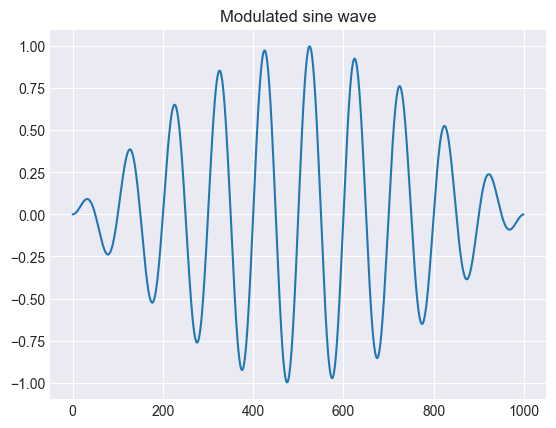

C:\Users\admin\AppData\Local\Temp\ipykernel_7820\1615627028.py:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


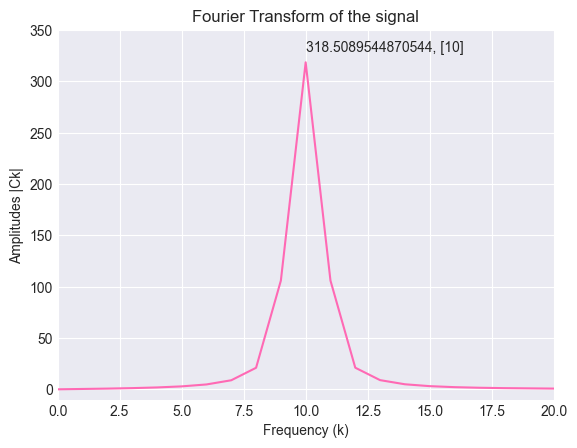

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cmath as m

#   Defining parameters
N = 1000                                    #    number of data points
n_values = np.arange(N)                     #   generate an array of indices 0 to N-1
y = np.sin((m.pi*n_values)/N)*np.sin((20*m.pi*n_values)/N)      #   given modulated sine wave signal stored in y

#   function to manually calculate Fourier coefficients
def calc_coeff(y):
    N = len(y)
    coeff = np.zeros(N//2+1, complex)

    for k in range(N//2+1):         #   loop over each frequency component
        for n in range(N):          #   loop over each data point
            coeff[k] += y[n]*m.exp(-2j*m.pi*k*n/N)      #   calculating the complex coefficient using the formula from Newman
    return coeff

#   plotting the original signal
plt.style.use('seaborn-darkgrid')
plt.plot(n_values,y)
plt.title('Modulated sine wave')
plt.show()


amplitudes = np.abs(calc_coeff(y))      #   taking absolute value to get amplitudes of Fourier coefficients     

#   plotting amplitudes of the Fourier 
plt.style.use('seaborn-darkgrid')
plt.plot(amplitudes, color = 'hotpink')
plt.xlim(0,20)                          #   adjusting the frequency range to put the only peak at center
plt.xlabel('Frequency (k)')
plt.ylabel('Amplitudes |Ck|')
plt.title('Fourier Transform of the signal')
plt.ylim(-10,350)

#   determining maximum amplitude and corresponding frequency
ymax = max(amplitudes)
xpos = np.where(amplitudes == ymax)
xmax = n_values[xpos]

#   annotating the plot with maximum amplitude and its corresponding frequency
plt.annotate(str(ymax)+', '+ str(xmax), xy=(xmax, ymax), xytext=(xmax, ymax+10))
plt.show()


In our initial observation, we note that the frequency of the first sine wave ($f_1$) in the product of two sine waves is 1/2 Hz. Simultaneously, the second frequency ($f_2$) is identified at 10 Hz. This distinction is visible in the Discrete Fourier Transform (DFT) plot, where a prominent peak occurs at 10 Hz, signifying the primary information about the modulated wave.


Score: 30/30

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

Run this command to list the directories in your Google Drive and check that the mount was successful.

In [3]:
# !ls drive/My\ Drive

Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [4]:
# file_path = "/content/drive/My Drive/AP155/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [5]:
# import numpy as np
# # dow = np.loadtxt(file_path+"dow.txt")
# dow = np.loadtxt("dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

Now you can start to write code for this problem!

C:\Users\admin\AppData\Local\Temp\ipykernel_7820\1633411156.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


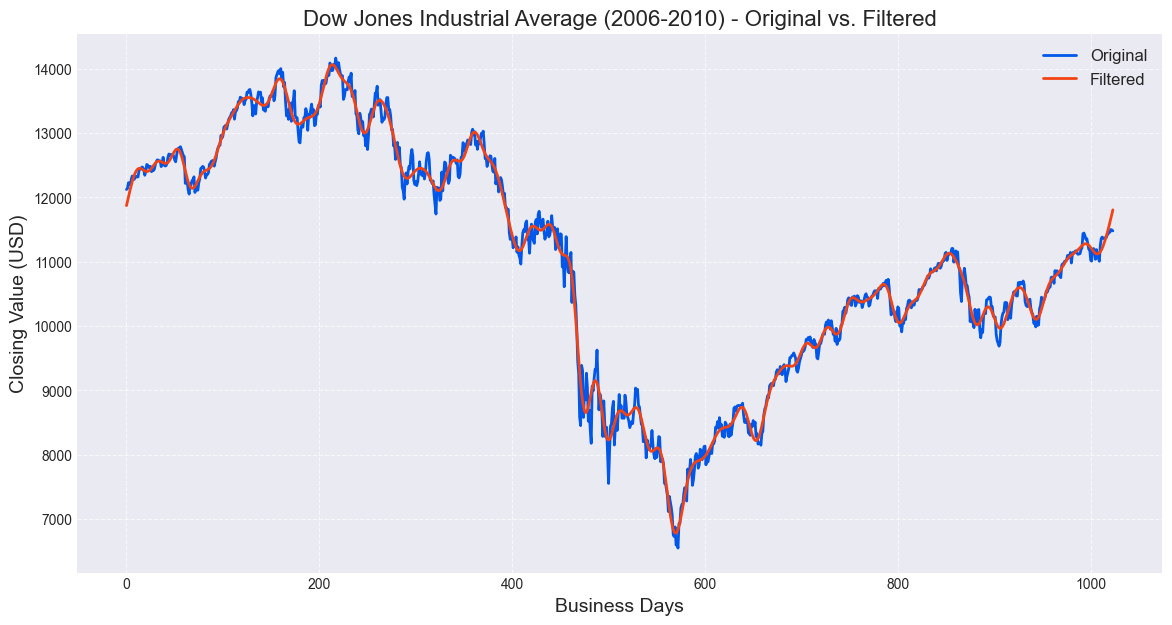

In [6]:
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
import numpy as np

dow = np.loadtxt("dow.txt")     #   Load Dow Jones dataset from dow.txt in the same folder as ipynb

dow_rfft = rfft(dow)            #   perform the Fourier transform
old_dow_rfft = dow_rfft.copy()
percent = 0.10                  #   set percentage 10%
n = int(len(dow_rfft) * percent)        #   get the last index n of the first 10% coefficients
dow_rfft[n:] = 0                        #   all coefficients beyond index n is set to zero

dow_filtered = irfft(dow_rfft)          #   Perform inverse Fourier transform to obtain the filtered signal

plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
plt.plot(dow, label = "Original", color = '#0057e9', linewidth=2)
plt.plot(dow_filtered, label = "Filtered", color = '#F34213', linewidth=2)
plt.title('Dow Jones Industrial Average (2006-2010) - Original vs. Filtered', fontsize=16)
plt.xlabel('Business Days', fontsize=14)
plt.ylabel('Closing Value (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


We were able to smoothen out the curve by setting the amplitude of coefficients to be zero at higher frequencies. In other words, setting the Fourier coefficients to zero essentially removes high-frequency components from the signal. These high frequency components cause the abrupt changes in the curve. Only the low-frequency components are are retained and this process acted like a denoising/smoothing process.

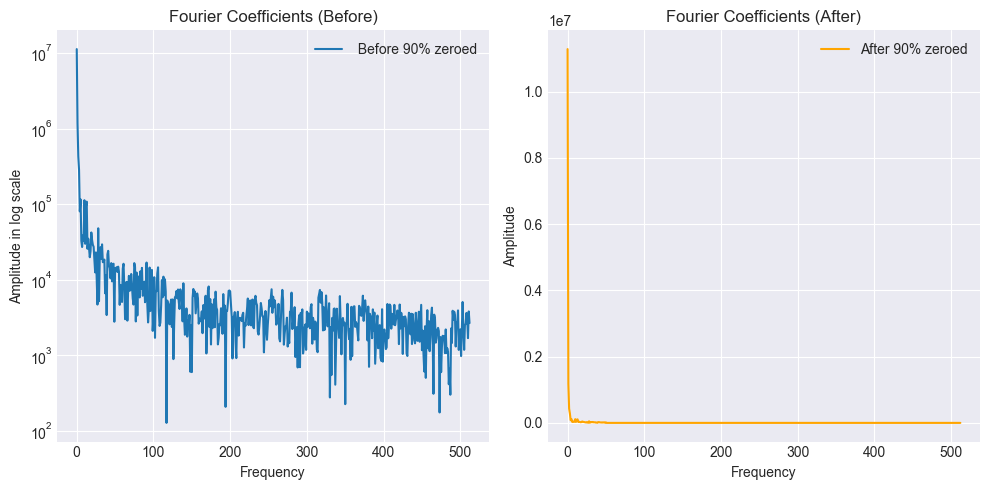

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.abs(old_dow_rfft), label = ' Before 90% zeroed')
plt.title('Fourier Coefficients (Before)')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Amplitude in log scale')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.abs(dow_rfft), color ='orange', label = 'After 90% zeroed')
plt.title('Fourier Coefficients (After)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

Here is the before and after comparison of the Fourier coefficients after zeroing the higher 90% of the frequency. In the "Before" subplot, the vertical axis is using the logarithmic scale for wider visualization. 10% of 500 is around 50 which means that frequencies around 50 onwards are zeroed. 

By zeroing out higher-frequency coefficients, the lower-frequency components are emphasized. Effectively, the signal in the frequency domain is simplified. Moreover, we performed a low-pass filtering operation since we zeroed high frequencies and allowed lower frequencies to 'pass' through.

Score: 70/70